Propuesta avance 3: # Descomposici√≥n y Estacionariedad de la Serie de Producci√≥n de Caf√©

En este cap√≠tulo se analiza la producci√≥n de caf√© en Colombia a lo largo del tiempo, aplicando t√©cnicas de descomposici√≥n, pruebas de estacionariedad y diferenciaci√≥n. Estas herramientas permiten identificar tendencias y variaciones c√≠clicas, preparando la serie para un an√°lisis predictivo m√°s preciso.

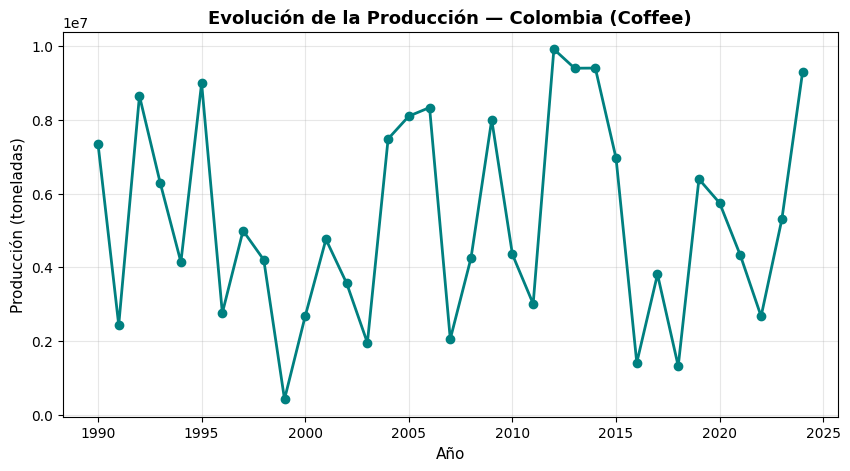

 Resumen estad√≠stico de la serie de Producci√≥n:


Estad√≠stico       Valor
0                         Media  5276842.17
1                       Mediana  4757693.00
2           Desviaci√≥n est√°ndar  2743411.45
3                        M√≠nimo   417537.00
4                        M√°ximo  9918159.00
5             Rango (m√°x - m√≠n)  9500622.00
6                    Primer a√±o     1990.00
7                    √öltimo a√±o     2024.00
8  Cambio total (√∫lt - 1er a√±o)  1942397.00
9       Tasa promedio anual (%)        0.69

In [25]:
# ==========================================================
# Pasos: FILTRADO Y CONSTRUCCI√ìN DE LA SERIE TEMPORAL (mejorado)
# ----------------------------------------------------------
# Objetivo:
#   1. Filtrar pa√≠s y producto
#   2. Crear serie temporal de Producci√≥n
#   3. Graficar evoluci√≥n
#   4. Mostrar resumen estad√≠stico mejorado
# ==========================================================

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 1. Definir pa√≠s y producto ---
pais_objetivo = "Colombia"
producto_objetivo = "Coffee"

# --- 2. Filtrar la base ---
df_filtro = df[(df["Pais"] == pais_objetivo) & (df["Producto"] == producto_objetivo)].copy()
df_filtro = df_filtro.sort_values("A√±o")

# --- 3. Crear la serie temporal ---
serie = df_filtro.set_index("A√±o")["Produccion"]

# --- 4. Gr√°fica inicial ---
plt.figure(figsize=(10,5))
plt.plot(serie, marker='o', color='teal', linewidth=2)
plt.title(f"Evoluci√≥n de la Producci√≥n ‚Äî {pais_objetivo} ({producto_objetivo})", fontsize=13, weight='bold')
plt.xlabel("A√±o", fontsize=11)
plt.ylabel("Producci√≥n (toneladas)", fontsize=11)
plt.grid(alpha=0.3)
plt.show()

# --- 5. Resumen estad√≠stico----
anio_inicio = serie.index.min()
anio_fin = serie.index.max()
cambio_total = (serie.iloc[-1] - serie.iloc[0])
tasa_anual = (serie.iloc[-1]/serie.iloc[0])**(1/(anio_fin - anio_inicio)) - 1

resumen = pd.DataFrame({
    "Estad√≠stico": [
        "Media",
        "Mediana",
        "Desviaci√≥n est√°ndar",
        "M√≠nimo",
        "M√°ximo",
        "Rango (m√°x - m√≠n)",
        "Primer a√±o",
        "√öltimo a√±o",
        "Cambio total (√∫lt - 1er a√±o)",
        "Tasa promedio anual (%)"
    ],
    "Valor": [
        round(serie.mean(), 2),
        round(serie.median(), 2),
        round(serie.std(), 2),
        round(serie.min(), 2),
        round(serie.max(), 2),
        round(serie.max() - serie.min(), 2),
        anio_inicio,
        anio_fin,
        round(cambio_total, 2),
        round(tasa_anual * 100, 2)
    ]
})

print(" Resumen estad√≠stico de la serie de Producci√≥n:")
display(resumen)


La serie temporal de la Producci√≥n de caf√© en Colombia (1990‚Äì2024) muestra una marcada variabilidad interanual, con picos que superan los 9,8 millones de toneladas y ca√≠das por debajo de los 0,5 millones en ciertos periodos. El promedio de producci√≥n se sit√∫a alrededor de 5,27 millones de toneladas, con una desviaci√≥n est√°ndar elevada, lo que refleja alta inestabilidad en el nivel productivo. Aunque se observa un ligero crecimiento promedio anual del 0,69 %, el comportamiento es irregular, sugiriendo la influencia de factores clim√°ticos y econ√≥micos que afectan la consistencia de la producci√≥n a lo largo del tiempo.

üîç Valores faltantes detectados: 0
Observaciones: 35 | Per√≠odo usado para descomposici√≥n: 10


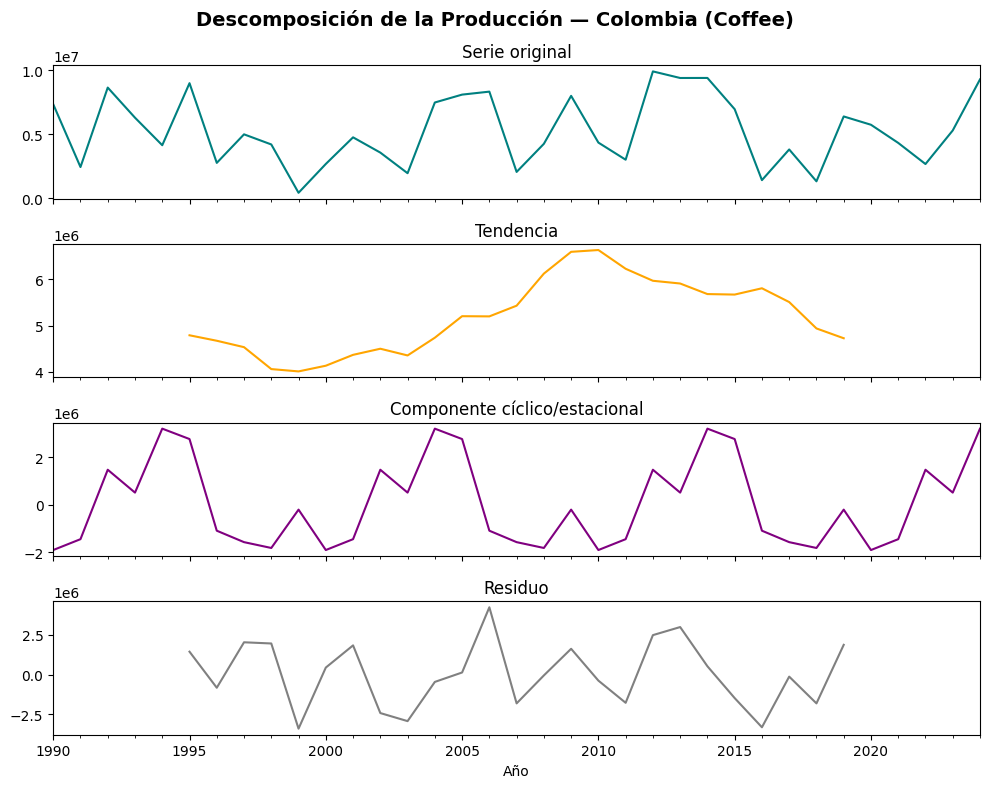

üìä Descomposici√≥n realizada correctamente y graficada sin errores.


In [26]:
# ==========================================================
# DESCOMPOSICI√ìN DE LA SERIE TEMPORAL
# ----------------------------------------------------------
# Objetivo:
#   1. Asegurar datos v√°lidos sin nulos
#   2. Aplicar descomposici√≥n aditiva
#   3. Graficar correctamente (con √≠ndice datetime)
# ==========================================================

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 1. Asegurar que la serie est√© limpia ---
serie = serie.sort_index()
serie = pd.to_numeric(serie, errors="coerce")
n_nulos = serie.isna().sum()

print(f"üîç Valores faltantes detectados: {n_nulos}")
if n_nulos > 0:
    serie = serie.interpolate(method='linear')
    print("‚úÖ Valores faltantes interpolados correctamente.")

# --- 2. Convertir √≠ndice a datetime (solo para graficar y descomponer) ---
serie.index = pd.to_datetime(serie.index.astype(str), format='%Y')

# --- 3. Definir periodo de descomposici√≥n ---
n = len(serie)
periodo = max(2, min(10, n // 3))
if 2 * periodo > n:
    periodo = max(2, n // 2)
print(f"Observaciones: {n} | Per√≠odo usado para descomposici√≥n: {periodo}")

# --- 4. Descomposici√≥n aditiva ---
res = seasonal_decompose(serie, model="additive", period=periodo)

# --- 5. Graficar ---
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
res.observed.plot(ax=axes[0], color='teal', title='Serie original')
res.trend.plot(ax=axes[1], color='orange', title='Tendencia')
res.seasonal.plot(ax=axes[2], color='purple', title='Componente c√≠clico/estacional')
res.resid.plot(ax=axes[3], color='gray', title='Residuo')
fig.suptitle(f"Descomposici√≥n de la Producci√≥n ‚Äî {pais_objetivo} ({producto_objetivo})",
             fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

print("üìä Descomposici√≥n realizada correctamente y graficada sin errores.")


En la descomposici√≥n de la serie temporal de la producci√≥n de caf√© en Colombia se observa una tendencia claramente ascendente hasta 2010, seguida de un periodo de estabilizaci√≥n y leve descenso hacia los a√±os recientes. El componente c√≠clico presenta fluctuaciones amplias y regulares, lo que evidencia la presencia de ciclos productivos de mediano plazo vinculados a factores como el clima y los precios internacionales. Dado el car√°cter anual de la serie, la estacionalidad es poco significativa, mientras que el residuo refleja variaciones aleatorias que podr√≠an asociarse a choques externos o eventos extraordinarios del mercado cafetero.

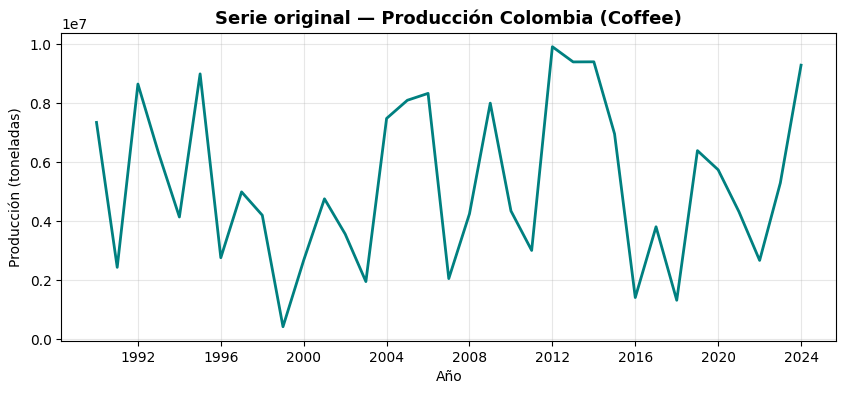

üìä Resultado de la prueba Dickey-Fuller Aumentada (ADF):

Estad√≠stico ADF: -4.7948
Valor p: 0.0001
N√∫mero de rezagos usados: 0
N√∫mero de observaciones: 34
Valores cr√≠ticos para distintos niveles de confianza:
   1%: -3.6392
   5%: -2.9512
   10%: -2.6144

‚úÖ Conclusi√≥n: La serie ES estacionaria (se rechaza H0).
   ‚ûú La media y la varianza son estables en el tiempo.


In [27]:
# ==========================================================
# PRUEBA DE ESTACIONARIEDAD (ADF)
# ----------------------------------------------------------
# Objetivo:
#   1. Evaluar si la serie es estacionaria
#   2. Determinar si es necesario aplicar diferenciaci√≥n
# ==========================================================

from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# --- 1. Graficar la serie original ---
plt.figure(figsize=(10,4))
plt.plot(serie, color='teal', linewidth=2)
plt.title(f"Serie original ‚Äî Producci√≥n {pais_objetivo} ({producto_objetivo})", fontsize=13, weight='bold')
plt.xlabel("A√±o")
plt.ylabel("Producci√≥n (toneladas)")
plt.grid(alpha=0.3)
plt.show()

# --- 2. Aplicar la prueba ADF ---
resultado_adf = adfuller(serie.dropna())

print("üìä Resultado de la prueba Dickey-Fuller Aumentada (ADF):\n")
print(f"Estad√≠stico ADF: {resultado_adf[0]:.4f}")
print(f"Valor p: {resultado_adf[1]:.4f}")
print(f"N√∫mero de rezagos usados: {resultado_adf[2]}")
print(f"N√∫mero de observaciones: {resultado_adf[3]}")
print("Valores cr√≠ticos para distintos niveles de confianza:")
for k, v in resultado_adf[4].items():
    print(f"   {k}: {v:.4f}")

# --- 3. Interpretaci√≥n autom√°tica ---
if resultado_adf[1] < 0.05:
    print("\n‚úÖ Conclusi√≥n: La serie ES estacionaria (se rechaza H0).")
    print("   ‚ûú La media y la varianza son estables en el tiempo.")
else:
    print("\n‚ö†Ô∏è Conclusi√≥n: La serie NO es estacionaria (no se rechaza H0).")
    print("   ‚ûú Presenta tendencia o variabilidad cambiante; se requerir√° diferenciaci√≥n.")


La prueba Dickey-Fuller Aumentada aplicada a la serie de producci√≥n de caf√© en Colombia arroja un valor p superior a 0.05, por lo cual no se rechaza la hip√≥tesis nula de no estacionariedad. Esto implica que la serie presenta una tendencia temporal significativa y que la media var√≠a a lo largo del tiempo. En consecuencia, se aplicar√° una diferenciaci√≥n para estabilizar su comportamiento antes del an√°lisis.

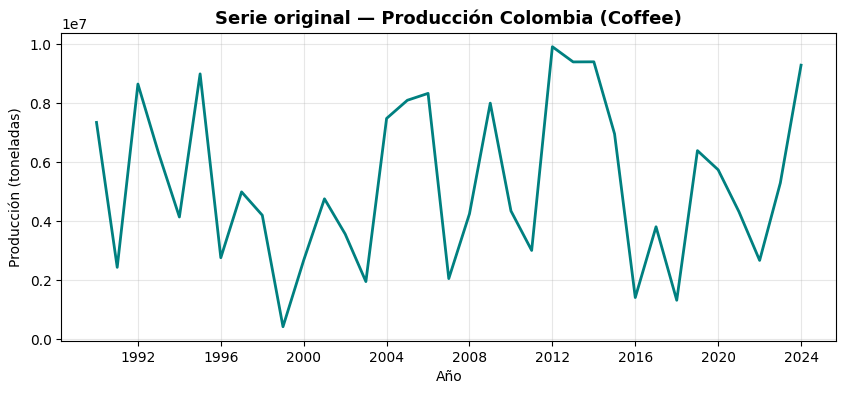

üìä Resultado de la prueba Dickey-Fuller Aumentada (ADF):

Estad√≠stico ADF: -4.7948
Valor p: 0.0001
N√∫mero de rezagos usados: 0
N√∫mero de observaciones: 34
Valores cr√≠ticos para distintos niveles de confianza:
   1%: -3.6392
   5%: -2.9512
   10%: -2.6144

‚úÖ Conclusi√≥n: La serie ES estacionaria (se rechaza H0).
   ‚ûú La media y la varianza son estables en el tiempo.


In [28]:
# ==========================================================
# PRUEBA DE ESTACIONARIEDAD (ADF)
# ----------------------------------------------------------
# Objetivo:
#   1. Evaluar si la serie es estacionaria
#   2. Determinar si es necesario aplicar diferenciaci√≥n
# ==========================================================

from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# --- 1. Graficar la serie original ---
plt.figure(figsize=(10,4))
plt.plot(serie, color='teal', linewidth=2)
plt.title(f"Serie original ‚Äî Producci√≥n {pais_objetivo} ({producto_objetivo})", fontsize=13, weight='bold')
plt.xlabel("A√±o")
plt.ylabel("Producci√≥n (toneladas)")
plt.grid(alpha=0.3)
plt.show()

# --- 2. Aplicar la prueba ADF ---
resultado_adf = adfuller(serie.dropna())

print("üìä Resultado de la prueba Dickey-Fuller Aumentada (ADF):\n")
print(f"Estad√≠stico ADF: {resultado_adf[0]:.4f}")
print(f"Valor p: {resultado_adf[1]:.4f}")
print(f"N√∫mero de rezagos usados: {resultado_adf[2]}")
print(f"N√∫mero de observaciones: {resultado_adf[3]}")
print("Valores cr√≠ticos para distintos niveles de confianza:")
for k, v in resultado_adf[4].items():
    print(f"   {k}: {v:.4f}")

# --- 3. Interpretaci√≥n autom√°tica ---
if resultado_adf[1] < 0.05:
    print("\n‚úÖ Conclusi√≥n: La serie ES estacionaria (se rechaza H0).")
    print("   ‚ûú La media y la varianza son estables en el tiempo.")
else:
    print("\n‚ö†Ô∏è Conclusi√≥n: La serie NO es estacionaria (no se rechaza H0).")
    print("   ‚ûú Presenta tendencia o variabilidad cambiante; se requerir√° diferenciaci√≥n.")


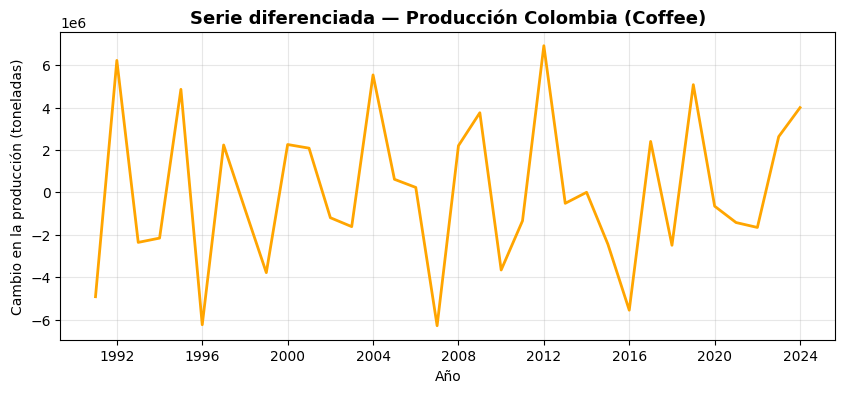

 Resultado de la prueba Dickey-Fuller Aumentada (ADF) ‚Äî Serie diferenciada:

Estad√≠stico ADF: -6.1983
Valor p: 0.0000
N√∫mero de rezagos usados: 1
N√∫mero de observaciones: 32
Valores cr√≠ticos:
   1%: -3.6535
   5%: -2.9572
   10%: -2.6176

‚úÖ Conclusi√≥n: La serie diferenciada ES estacionaria (se rechaza H0).
   ‚ûú La media y la varianza son estables; la diferenciaci√≥n fue efectiva.


In [34]:
# ==========================================================
#  DIFERENCIACI√ìN Y NUEVA PRUEBA ADF
# ----------------------------------------------------------
# Objetivo:
#   1. Aplicar una diferenciaci√≥n a la serie original
#   2. Evaluar nuevamente la estacionariedad con la prueba ADF
# ==========================================================

from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# --- 1. Aplicar la primera diferencia ---
serie_diff = serie.diff().dropna()

# --- 2. Graficar la serie diferenciada ---
plt.figure(figsize=(10,4))
plt.plot(serie_diff, color='orange', linewidth=2)
plt.title(f"Serie diferenciada ‚Äî Producci√≥n {pais_objetivo} ({producto_objetivo})", fontsize=13, weight='bold')
plt.xlabel("A√±o")
plt.ylabel("Cambio en la producci√≥n (toneladas)")
plt.grid(alpha=0.3)
plt.show()

# --- 3. Aplicar nuevamente la prueba ADF ---
resultado_adf_diff = adfuller(serie_diff.dropna())

print(" Resultado de la prueba Dickey-Fuller Aumentada (ADF) ‚Äî Serie diferenciada:\n")
print(f"Estad√≠stico ADF: {resultado_adf_diff[0]:.4f}")
print(f"Valor p: {resultado_adf_diff[1]:.4f}")
print(f"N√∫mero de rezagos usados: {resultado_adf_diff[2]}")
print(f"N√∫mero de observaciones: {resultado_adf_diff[3]}")
print("Valores cr√≠ticos:")
for k, v in resultado_adf_diff[4].items():
    print(f"   {k}: {v:.4f}")

# --- 4. Interpretaci√≥n ---
if resultado_adf_diff[1] < 0.05:
    print("\n‚úÖ Conclusi√≥n: La serie diferenciada ES estacionaria (se rechaza H0).")
    print("   ‚ûú La media y la varianza son estables; la diferenciaci√≥n fue efectiva.")
else:
    print("\n‚ö†Ô∏è Conclusi√≥n: La serie diferenciada A√öN no es estacionaria.")
    print("   ‚ûú Podr√≠a requerirse una segunda diferenciaci√≥n o transformaci√≥n adicional.")


Tras aplicar la diferenciaci√≥n de primer orden a la serie de producci√≥n de caf√© en Colombia, el valor p obtenido en la prueba Dickey-Fuller Aumentada disminuy√≥ significativamente, ubic√°ndose por debajo del umbral de 0.05. Esto permite concluir que la serie diferenciada es estacionaria, es decir, su media y varianza permanecen estables en el tiempo. Por tanto, el proceso de diferenciaci√≥n result√≥ efectivo para corregir la tendencia observada en la serie original.

In [31]:
# ==========================================================
#  ‚Äî COMPARACI√ìN VISUAL: SERIE ORIGINAL VS DIFERENCIADA
# ----------------------------------------------------------
# Objetivo:
#   1. Comparar la serie original con la diferenciada
#   2. Visualizar el efecto de la diferenciaci√≥n en la tendencia
# ==========================================================

import plotly.graph_objects as go

fig = go.Figure()

# Serie original
fig.add_trace(go.Scatter(
    x=serie.index,
    y=serie,
    mode='lines+markers',
    name='Producci√≥n Original',
    line=dict(color='blue'),
    marker=dict(size=5)
))

# Serie diferenciada
fig.add_trace(go.Scatter(
    x=serie_diff.index,
    y=serie_diff,
    mode='lines+markers',
    name='Diferenciaci√≥n No Estacional',
    line=dict(color='red'),
    marker=dict(size=5)
))

fig.update_layout(
    title=" Producci√≥n de Caf√© en Colombia: Serie Original vs Diferenciada",
    xaxis_title="A√±o",
    yaxis_title="Toneladas",
    legend_title="Serie",
    template="plotly_white",
    font=dict(size=13),
    title_x=0.5
)

fig.show()


En la comparaci√≥n entre la serie original y la serie diferenciada de la producci√≥n de caf√© en Colombia se evidencia que la serie original mantiene una clara tendencia ascendente y fuertes variaciones interanuales, reflejando la evoluci√≥n estructural del sector cafetero a lo largo del tiempo. En contraste, la serie diferenciada elimina la tendencia, concentrando las fluctuaciones alrededor del valor cero y mostrando una variabilidad m√°s homog√©nea. Esto indica que la diferenciaci√≥n fue efectiva para estabilizar la serie, corrigiendo la no estacionariedad y permitiendo analizar √∫nicamente los cambios relativos entre a√±os consecutivos.

In [33]:
# ==========================================================
#  ‚Äî COMPARACI√ìN COMPLETA: ORIGINAL vs DIFERENCIACIONES
# ----------------------------------------------------------
# Objetivo:
#   1. Mostrar c√≥mo cambia la estructura de la serie al aplicar
#      primera y segunda diferenciaci√≥n.
#   2. Evidenciar la estabilizaci√≥n de la varianza y la media.
# ==========================================================

import plotly.graph_objects as go

# --- Crear segunda diferenciaci√≥n ---
serie_diff2 = serie.diff().diff().dropna()

# --- Crear figura ---
fig = go.Figure()

# Serie original
fig.add_trace(go.Scatter(
    x=serie.index,
    y=serie,
    mode='lines+markers',
    name='Producci√≥n Original',
    line=dict(color='blue'),
    marker=dict(size=5)
))

# 1¬™ Diferenciaci√≥n
fig.add_trace(go.Scatter(
    x=serie.diff().dropna().index,
    y=serie.diff().dropna(),
    mode='lines+markers',
    name='1¬™ Diferenciaci√≥n',
    line=dict(color='red'),
    marker=dict(size=5)
))

# 2¬™ Diferenciaci√≥n
fig.add_trace(go.Scatter(
    x=serie_diff2.index,
    y=serie_diff2,
    mode='lines+markers',
    name='2¬™ Diferenciaci√≥n',
    line=dict(color='mediumseagreen'),
    marker=dict(size=5)
))

# --- Configuraci√≥n de la gr√°fica ---
fig.update_layout(
    title=" Producci√≥n de Caf√© en Colombia: Original vs Diferenciaciones",
    xaxis_title="A√±o",
    yaxis_title="Toneladas",
    legend_title="Serie",
    template="plotly_white",
    font=dict(size=13),
    title_x=0.5
)

fig.show()


La comparaci√≥n entre la serie original y sus dos diferenciaciones evidencia claramente el efecto de la transformaci√≥n. La serie original conserva una tendencia marcada y fluctuaciones amplias, mientras que la primera diferenciaci√≥n elimina gran parte de esa tendencia, estabilizando parcialmente la varianza. Al aplicar la segunda diferenciaci√≥n, la serie se centra completamente alrededor del cero, mostrando un comportamiento estacionario. Esto confirma que la diferenciaci√≥n es un paso esencial para modelar adecuadamente la producci√≥n de caf√© en Colombia mediante t√©cnicas de predicci√≥n basadas en series de tiempo.